In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Uber.csv") 

In [5]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.shape

(200000, 9)

In [9]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# 1.Pre-process the dataset

In [16]:
# Find Total Number Of Missing Values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [18]:
#dropping rows with missing values
df.dropna(inplace = True)

In [20]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
#converting datatype of column "pickup_datetime" from object to DateTime
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


# df.dtypes

In [29]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [31]:
def haversine (lon_1, lon_2, lat_1, lat_2):
  lon_1, lon_2, lat_1, lat_2=map(np.radians,[lon_1,lon_2,lat_1,lat_2])
  diff_lon=lon_2-lon_1
  diff_lat=lat_2-lat_1
  km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                            np.cos(lat_1) * np.cos(lat_2)* np.sin(diff_lon/2.0)**2))
  return km

In [33]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [35]:
df['Distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

In [37]:
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

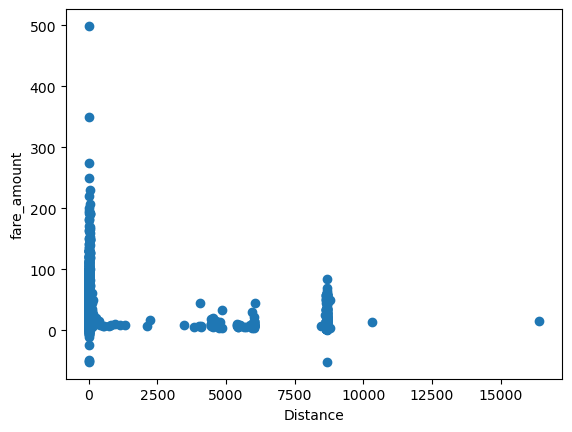

In [39]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

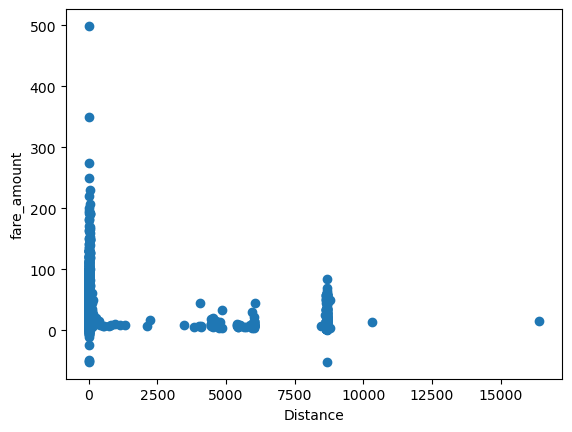

In [40]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [41]:
df2=pd.DataFrame().assign(fare=df['fare_amount'],Distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      199999 non-null  float64
 1   Distance  199999 non-null  float64
dtypes: float64(2)
memory usage: 4.6 MB


In [42]:
df2.shape

(199999, 2)

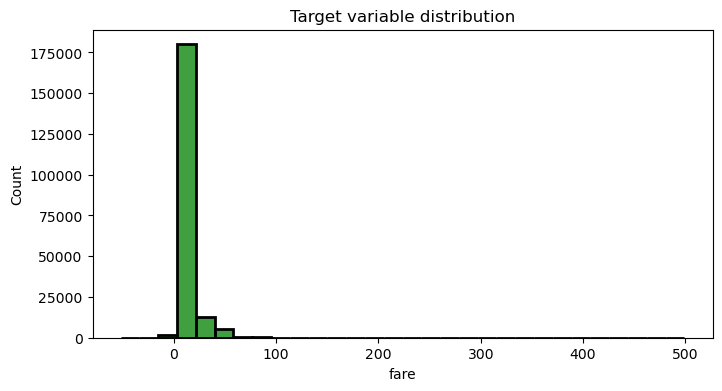

In [47]:
plt.figure(figsize=[8, 4])
sns.histplot(df2['fare'], color='g', edgecolor="black", linewidth=2, bins=30)
plt.title('Target variable distribution')
plt.show()

Text(0, 0.5, 'fare_amount')

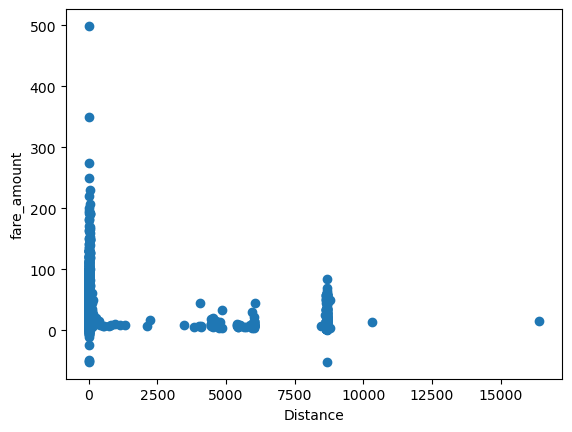

In [49]:
plt.scatter(df2['Distance'],df2['fare'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")


# 2.Identify outliers

In [51]:
# OUTLIER: An object that deviates significantly from rest of the objects

<Axes: xlabel='fare_amount', ylabel='Density'>

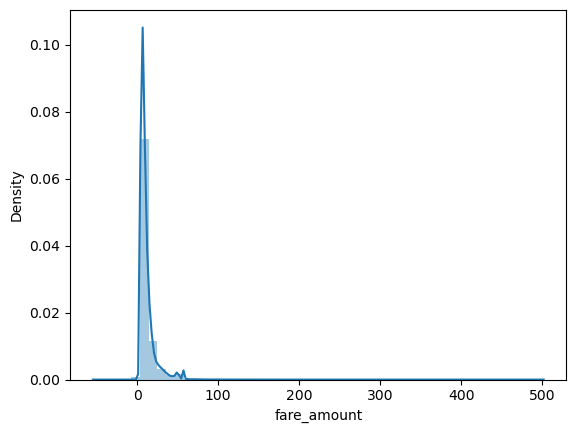

In [52]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['fare_amount'])

<Axes: xlabel='pickup_latitude', ylabel='Density'>

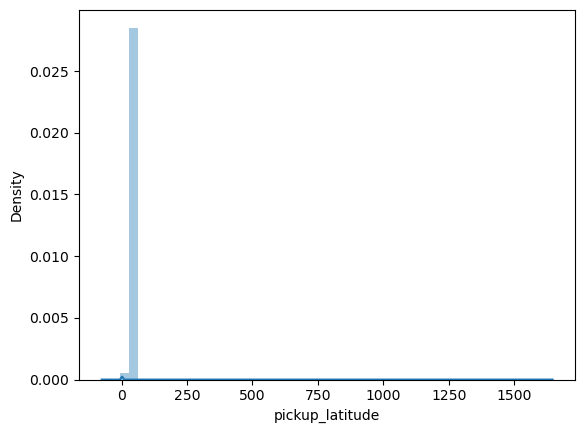

In [54]:
sns.distplot(df['pickup_latitude'])

<Axes: xlabel='pickup_longitude', ylabel='Density'>

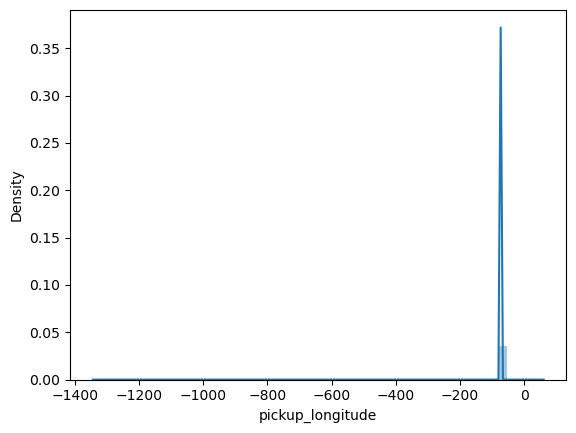

In [56]:
sns.distplot(df['pickup_longitude'])

<Axes: xlabel='dropoff_longitude', ylabel='Density'>

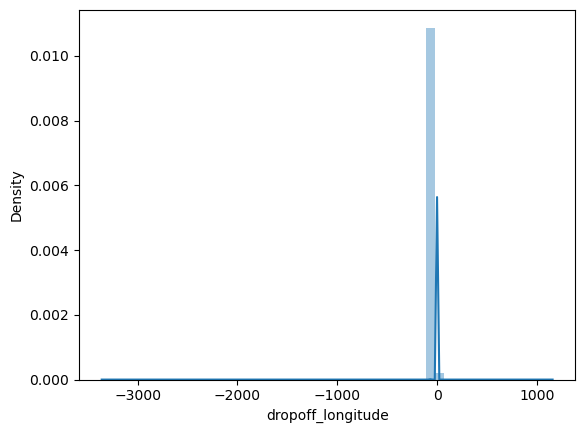

In [57]:
sns.distplot(df['dropoff_longitude'])

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

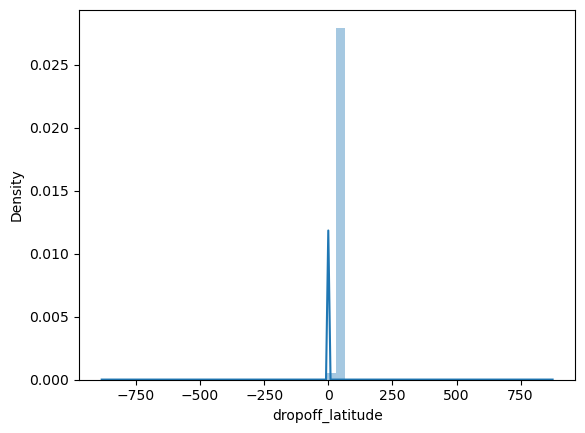

In [58]:
sns.distplot(df['dropoff_latitude'])

In [59]:
#creating a function to identify outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [60]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [61]:
#you can also pass two columns as argument to the function (here "passenger_count" and "fair_amount")

outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [70]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154774142
-18.345388448825922


In [72]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.54


In [74]:
df = df.drop(["key"], axis = 1)
df

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.54


# 3.Check the correlation

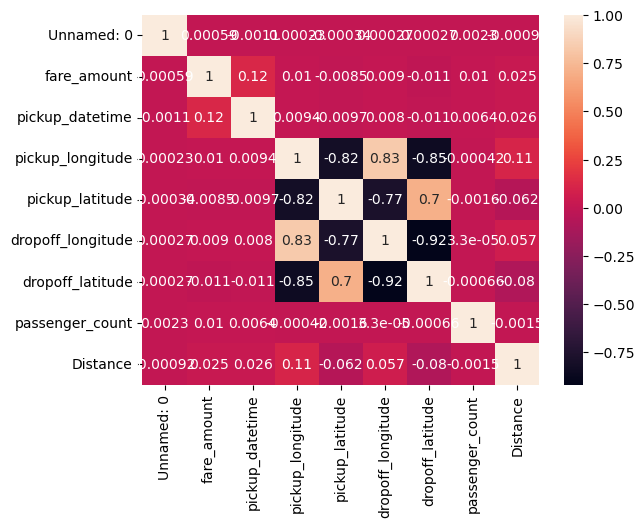

In [77]:
#creating a correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [79]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view

import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [80]:
#label encoding (categorical to numerical)

df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [83]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,hour,month,year,weekday
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.68,7,19,5,2015,4
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.46,17,20,7,2009,5
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.04,24,21,8,2009,1
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.66,26,8,6,2009,5
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.48,28,17,8,2014,4


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   Distance           199999 non-null  float64
 8   day                199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  month              199999 non-null  int64  
 11  year               199999 non-null  int64  
 12  weekday            199999 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 21.4 MB


In [87]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [89]:
#independent variables (x)

x=df.drop("fare_amount", axis=1)
x

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,hour,month,year,weekday
0,24238194,-73.999817,40.738354,-73.999512,40.723217,1,1.68,7,19,5,2015,4
1,27835199,-73.994355,40.728225,-73.994710,40.750325,1,2.46,17,20,7,2009,5
2,44984355,-74.005043,40.740770,-73.962565,40.772647,1,5.04,24,21,8,2009,1
3,25894730,-73.976124,40.790844,-73.965316,40.803349,3,1.66,26,8,6,2009,5
4,17610152,-73.925023,40.744085,-73.973082,40.761247,5,4.48,28,17,8,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,-73.987042,40.739367,-73.986525,40.740297,1,0.11,28,10,10,2012,0
199996,16382965,-73.984722,40.736837,-74.006672,40.739620,1,1.88,14,1,3,2014,5
199997,27804658,-73.986017,40.756487,-73.858957,40.692588,2,12.85,29,0,6,2009,1
199998,20259894,-73.997124,40.725452,-73.983215,40.695415,1,3.54,20,14,5,2015,3


In [91]:
#dependent variable (y)

y=df["fare_amount"]

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [95]:
x_train.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,hour,month,year,weekday
80768,37342228,-73.983703,40.725752,-73.972000,40.793888,1,7.64,22,1,2,2009,0
111783,34052804,-73.961175,40.760667,-73.976507,40.747570,1,1.95,7,14,3,2009,6
24615,52939040,-73.947784,40.783111,-73.955408,40.779405,1,0.76,17,11,3,2011,4
46932,20073661,-73.980596,40.733797,-73.972092,40.747297,1,1.66,15,7,1,2010,5
86655,28423842,-73.963035,40.758380,-73.987877,40.745477,2,2.54,28,19,6,2014,6


In [97]:
x_test.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,hour,month,year,weekday
13588,50390912,-73.982810,40.771687,-73.977065,40.763200,1,1.06,25,22,6,2013,2
29803,36549000,-73.991985,40.725763,-73.995762,40.759797,1,3.80,20,20,2,2011,0
138265,41414868,-73.985730,40.767882,-73.998525,40.760667,1,1.34,20,14,10,2013,0
82856,41011702,-73.973200,40.748100,-73.973500,40.748200,1,0.03,17,18,11,2011,4
162747,5744097,-74.007432,40.716580,-73.986858,40.761328,1,5.27,10,22,2,2009,2


In [99]:
y_train.head()

80768     19.7
111783     7.7
24615      4.5
46932      4.5
86655     10.0
Name: fare_amount, dtype: float64

In [101]:
y_test.head()

13588      5.5
29803     11.3
138265     6.5
82856     18.1
162747    11.3
Name: fare_amount, dtype: float64

In [103]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(159999, 12)
(40000, 12)
(40000,)
(159999,)


# 4.Implementing linear regression and random forest regression models

In [106]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [108]:
predictedvalues = lrmodel.predict(x_test)

In [110]:
#Calculating the value of RMSE for Linear Regression

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.804868955189567


In [112]:
# prediction

pred = lrmodel.predict(x_test)
print("hh", pred)
lrmodel.predict(x_test)

hh [11.88343133 10.28380849 12.68226262 ... 10.93039555 13.02247823
  9.67515276]


array([11.88343133, 10.28380849, 12.68226262, ..., 10.93039555,
       13.02247823,  9.67515276])

In [114]:
from sklearn import metrics

# R2 score

#Calculating the value of R2 for Linear Regression
metrics.r2_score(y_test,predictedvalues)



0.017171864852416396

# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your original DataFrame
# Use only the top 20 rows
df_top20 = df.head(20)

In [119]:
# Select features and target
X = df_top20.drop(columns=['passenger_count'])  # Features
y = df_top20['passenger_count']  # Target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Create and fit the Random Forest Regressor model
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [123]:
# Make predictions
rfrmodel_pred = rfrmodel.predict(x_test)

In [125]:
# Calculate RMSE
rfrmodel_rmse = np.sqrt(mean_squared_error(y_test, rfrmodel_pred))
print("RMSE value for Random Forest regression is:", rfrmodel_rmse)

RMSE value for Random Forest regression is: 0.6905070600652827


In [127]:
# Calculate R² score
rfrmodel_r2 = r2_score(y_test, rfrmodel_pred)
print("R² value for Random Forest regression is:", rfrmodel_r2)

R² value for Random Forest regression is: -0.9071999999999998
